# Chapter 13. 텐서플로를 사용한 신경망 훈련
## 13.1 텐서플로와 훈련 성능
## 13.2 텐서플로 처음 시작하기

In [1]:
import tensorflow as tf
import numpy as np

np.set_printoptions(precision=3)

In [2]:
a = np.array([1, 2, 3], dtype=np.int32)
b = [4, 5, 6]

In [3]:
t_a = tf.convert_to_tensor(a)
t_b = tf.convert_to_tensor(b)

2022-04-21 22:56:04.167366: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-21 22:56:04.177612: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


In [7]:
# Warning message: 
# 최신 CPU들은 AVX, SSE4 같은 명령어들을 제공 - 선형대수 연산을 좀 더 빠르게 수행할 수 있도록 도와주는 역할
# Reference) https://github.com/tensorflow/tensorflow/issues/8037

# Solution 1) 그냥 무시하기 - 속도가 느려도 상관 없는 경우
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Solution 2) 환경에 맞게 텐서플로우 바이너리를 다시 컴파일
# Reference) https://www.tensorflow.org/install/source#macos

In [4]:
print(t_a)
print(t_b)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)


In [5]:
t_ones = tf.ones((2, 3))
t_ones.shape

TensorShape([2, 3])

In [6]:
t_ones.numpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [7]:
const_tensor = tf.constant([1.2, 5, np.pi], dtype=np.float32)
print(const_tensor)

tf.Tensor([1.2   5.    3.142], shape=(3,), dtype=float32)


### 13.2.3 텐서의 데이터 타입과 크기 조작

In [8]:
# 데이터 타입 바꾸기
t_a_new = tf.cast(t_a, tf.int64)
print(t_a_new.dtype)

<dtype: 'int64'>


In [9]:
# 전치하기 (transpose)
t = tf.random.uniform(shape=(3, 5))
t_tr = tf.transpose(t)
print(t.shape, '-->', t_tr.shape)

(3, 5) --> (5, 3)


In [10]:
# 1차원 배열에서 2차원 배열로
t = tf.zeros((30, ))
t_reshape = tf.reshape(t, shape=(5, 6))
print(t_reshape.shape)

(5, 6)


In [11]:
# 불필요한 차원 삭제하기
t = tf.zeros((1, 2, 1, 4, 1))
t_sqz = tf.squeeze(t, axis=(2, 4))
print(t.shape, '-->', t_sqz.shape)

(1, 2, 1, 4, 1) --> (1, 2, 4)


### 13.2.4 텐서에 수학 연산 적용

In [12]:
tf.random.set_seed(1)
t1 = tf.random.uniform(shape=(5, 2), minval=-1.0, maxval=1.0)
t2 = tf.random.normal(shape=(5, 2), mean=0.0, stddev=1.0)

In [13]:
# 원소별 곱셈
t3 = tf.multiply(t1, t2).numpy()
print(t3)

[[-0.27  -0.874]
 [-0.017 -0.175]
 [-0.296 -0.139]
 [-0.727  0.135]
 [-0.401  0.004]]


In [14]:
# 특정 축을 따라 평균, 합, 표준 편차 계산
t4 = tf.math.reduce_mean(t1, axis=0)  # 열 방향
print(t4)

tf.Tensor([0.09  0.207], shape=(2,), dtype=float32)


In [15]:
# 행렬 곱셈
t5 = tf.linalg.matmul(t1, t2, transpose_b=True)
print(t5.numpy())

[[-1.144  1.115 -0.87  -0.321  0.856]
 [ 0.248 -0.191  0.25  -0.064 -0.331]
 [-0.478  0.407 -0.436  0.022  0.527]
 [ 0.525 -0.234  0.741 -0.593 -1.194]
 [-0.099  0.26   0.125 -0.462 -0.396]]


In [16]:
t6 = tf.linalg.matmul(t1, t2, transpose_a=True)
print(t6.numpy())

[[-1.711  0.302]
 [ 0.371 -1.049]]


In [17]:
# norm 계산하기
norm_t1 = tf.norm(t1, ord=2, axis=1).numpy()
print(norm_t1)

[1.046 0.293 0.504 0.96  0.383]


## 13.3 텐서플로 데이터셋 API (tf.data)를 사용하여 입력 파이프라인 구축

* 매번 전처리 함수를 수동으로 적용하는 것은 매우 번거로우므로 간편한 전처리 파이프라인을 만들어 주는 특별한 클래스를 제공

## 13.3.1 텐서에서 텐서플로 데이터셋 만들기

`tf.data.Dataset.from_tensor_slices()` 함수  
`batch()` 매서드  

## 13.3.2 두 개의 텐서를 하나의 데이터셋으로 연결

In [18]:
tf.random.set_seed(1)
t_x = tf.random.uniform([4, 3], dtype=tf.float32)
t_y = tf.range(4)

In [19]:
# 특성이 있는 텐서와 클래스 레이블의 텐서 합치기
ds_joint = tf.data.Dataset.from_tensor_slices((t_x, t_y))
for example in ds_joint:
    print(' x:', example[0].numpy(),
          ' y:', example[1].numpy())

 x: [0.165 0.901 0.631]  y: 0
 x: [0.435 0.292 0.643]  y: 1
 x: [0.976 0.435 0.66 ]  y: 2
 x: [0.605 0.637 0.614]  y: 3


In [20]:
# 원소 별 변환 하기
ds_trans = ds_joint.map(lambda x, y: (x * 2 - 1.0, y))
for example in ds_trans:
    print(' x:', example[0].numpy(),
          ' y:', example[1].numpy())

 x: [-0.67   0.803  0.262]  y: 0
 x: [-0.131 -0.416  0.285]  y: 1
 x: [ 0.952 -0.13   0.32 ]  y: 2
 x: [0.21  0.273 0.229]  y: 3


### 13.3.3 shuffle(), batch(), repeat() 매서드

In [21]:
# 훈련 데이터를 무작위로 섞은 배치로 만들어 주입하려면
tf.random.set_seed(1)
ds = ds_joint.shuffle(buffer_size=len(t_x))  # t_x의 길이만큼 원소를 꺼내서 섞기
for example in ds:
    print(' x:', example[0].numpy(),
          ' y:', example[1].numpy())

 x: [0.976 0.435 0.66 ]  y: 2
 x: [0.435 0.292 0.643]  y: 1
 x: [0.165 0.901 0.631]  y: 0
 x: [0.605 0.637 0.614]  y: 3


In [22]:
# 배치로 만들기
ds = ds_joint.batch(batch_size=3, drop_remainder=False)
batch_x, batch_y = next(iter(ds))
print('배치 x:\n', batch_x.numpy())
print('배치 y: ', batch_y.numpy())

배치 x:
 [[0.165 0.901 0.631]
 [0.435 0.292 0.643]
 [0.976 0.435 0.66 ]]
배치 y:  [0 1 2]


### 13.3.4 로컬 디스크에 있는 파일에서 데이터셋 만들기

* cat_dog_images 디렉토리에서 그림 불러오기

In [24]:
import pathlib
imgdir_path = pathlib.Path('/Users/sunghyouk/study_room/cat_dog_images')
file_list = sorted([str(path) for path in
                    imgdir_path.glob('*.jpg')])
print(file_list)

['/Users/sunghyouk/study_room/cat_dog_images/cat-01.jpg', '/Users/sunghyouk/study_room/cat_dog_images/cat-02.jpg', '/Users/sunghyouk/study_room/cat_dog_images/cat-03.jpg', '/Users/sunghyouk/study_room/cat_dog_images/dog-01.jpg', '/Users/sunghyouk/study_room/cat_dog_images/dog-02.jpg', '/Users/sunghyouk/study_room/cat_dog_images/dog-03.jpg']


이미지 크기:  (900, 1200, 3)
이미지 크기:  (900, 1200, 3)
이미지 크기:  (900, 742, 3)
이미지 크기:  (800, 1200, 3)
이미지 크기:  (800, 1200, 3)
이미지 크기:  (900, 1200, 3)


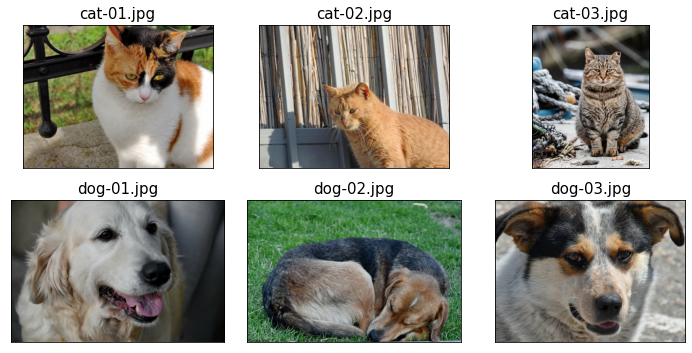

In [25]:
import matplotlib.pyplot as plt
import os

fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img_raw = tf.io.read_file(file)
    img = tf.image.decode_image(img_raw)
    print('이미지 크기: ', img.shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()

In [26]:
labels = [1 if 'dog' in os.path.basename(file) else 0
          for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [27]:
# 파일 이름의 리스트와 레이블 리스트 합하기
ds_files_labels = tf.data.Dataset.from_tensor_slices(
    (file_list, labels))
for item in ds_files_labels:
    print(item[0].numpy(), item[1].numpy())

b'/Users/sunghyouk/study_room/cat_dog_images/cat-01.jpg' 0
b'/Users/sunghyouk/study_room/cat_dog_images/cat-02.jpg' 0
b'/Users/sunghyouk/study_room/cat_dog_images/cat-03.jpg' 0
b'/Users/sunghyouk/study_room/cat_dog_images/dog-01.jpg' 1
b'/Users/sunghyouk/study_room/cat_dog_images/dog-02.jpg' 1
b'/Users/sunghyouk/study_room/cat_dog_images/dog-03.jpg' 1


In [28]:
# 데이터셋에 변환을 적용하고,
# 파일 경로에서 이미지를 로드하고,
# 원본 데이터를 디코딩한 후 
# 크기를 일정하게 변경
def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0
    return image, label

In [29]:
img_width, img_height = 120, 80
ds_images_labels = ds_files_labels.map(load_and_preprocess)

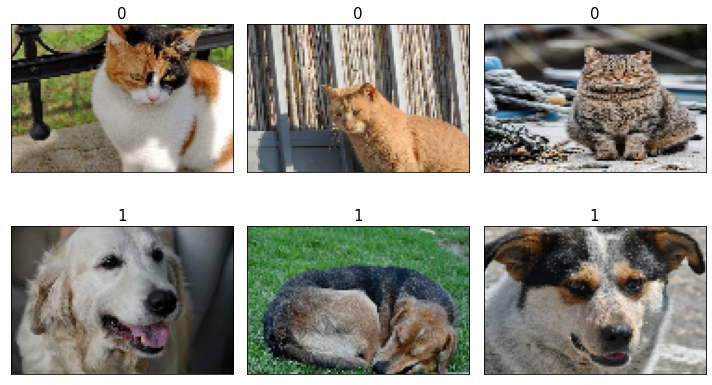

In [30]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(ds_images_labels):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0])
    ax.set_title('{}'.format(example[1].numpy()),
                 size=15)
plt.tight_layout()
plt.show()

### 13.3.5 tensorflow_datasets 라이브러리에서 데이터셋 로드

In [14]:
import tensorflow as tf

In [15]:
import tensorflow_datasets as tfds
print(len(tfds.list_builders()))

1052


In [16]:
print(tfds.list_builders()[:5])

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset']


In [17]:
celeba_bldr = tfds.builder('celeb_a')

In [18]:
print(celeba_bldr.info.features)

FeaturesDict({
    'attributes': FeaturesDict({
        '5_o_Clock_Shadow': tf.bool,
        'Arched_Eyebrows': tf.bool,
        'Attractive': tf.bool,
        'Bags_Under_Eyes': tf.bool,
        'Bald': tf.bool,
        'Bangs': tf.bool,
        'Big_Lips': tf.bool,
        'Big_Nose': tf.bool,
        'Black_Hair': tf.bool,
        'Blond_Hair': tf.bool,
        'Blurry': tf.bool,
        'Brown_Hair': tf.bool,
        'Bushy_Eyebrows': tf.bool,
        'Chubby': tf.bool,
        'Double_Chin': tf.bool,
        'Eyeglasses': tf.bool,
        'Goatee': tf.bool,
        'Gray_Hair': tf.bool,
        'Heavy_Makeup': tf.bool,
        'High_Cheekbones': tf.bool,
        'Male': tf.bool,
        'Mouth_Slightly_Open': tf.bool,
        'Mustache': tf.bool,
        'Narrow_Eyes': tf.bool,
        'No_Beard': tf.bool,
        'Oval_Face': tf.bool,
        'Pale_Skin': tf.bool,
        'Pointy_Nose': tf.bool,
        'Receding_Hairline': tf.bool,
        'Rosy_Cheeks': tf.bool,
        'Sidebu

### CelebA 다운로드 안될 때 해 볼 수 잇는 방법

아래 셀에서 CelebA 데이터를 다운로드할 때 에러가 발생하면 https://git.io/JL5GM 에서 4개의 파일을 수동으로 받아 ~/tensorflow_datasets/downloads/manual로 복사하세요.  
또는 <https://drive.google.com/u/0/uc?export=download&confirm=W-9Y&id=1tCj_CKUgjtThk1fiL0wP0WiuYxk4dvjT>에서 수동으로 다운로드하여 사용하세요.  

* 코랩을 사용하는 경우 
    - 구글 드라이브에 업로드한 뒤 아래 코드를 실행하고 파일을 복사하세요.
    - 여기서는 구글 드라이브 datasets/celeba 폴더에 파일이 있다고 가정합니다.

```python
from google.colab import drive
drive.mount('/drive')
!mkdir -p ~/tensorflow_datasets/downloads/manual
!cp /drive/MyDrive/datasets/celeba/img_align_celeba.zip ~/tensorflow_datasets/downloads/manual
!cp /drive/MyDrive/datasets/celeba/list_attr_celeba.txt ~/tensorflow_datasets/downloads/manual
!cp /drive/MyDrive/datasets/celeba/list_eval_partition.txt ~/tensorflow_datasets/downloads/manual
!cp /drive/MyDrive/datasets/celeba/list_landmarks_align_celeba.txt ~/tensorflow_datasets/downloads/manual
```

In [19]:
celeba_bldr.download_and_prepare()

datasets = celeba_bldr.as_dataset(shuffle_files=False)
datasets.keys()

dict_keys(['test', 'train', 'validation'])

In [20]:
# datasets = tfds.load('celeb_a', with_info=True, shuffle_files=False, download=True)

In [21]:
ds_train = datasets['train']
assert isinstance(ds_train, tf.data.Dataset)

example = next(iter(ds_train))
print(type(example))
print(example.keys())

2022-04-22 07:28:26.703919: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


<class 'dict'>
dict_keys(['attributes', 'image', 'landmarks'])


In [22]:
ds_train = ds_train.map(lambda item:
    (item['image'],
     tf.cast(item['attributes']['Male'],tf.int32)))

In [23]:
ds_train = ds_train.batch(18)
images, labels = next(iter(ds_train))
print(images.shape, labels)

(18, 218, 178, 3) tf.Tensor([0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1], shape=(18,), dtype=int32)


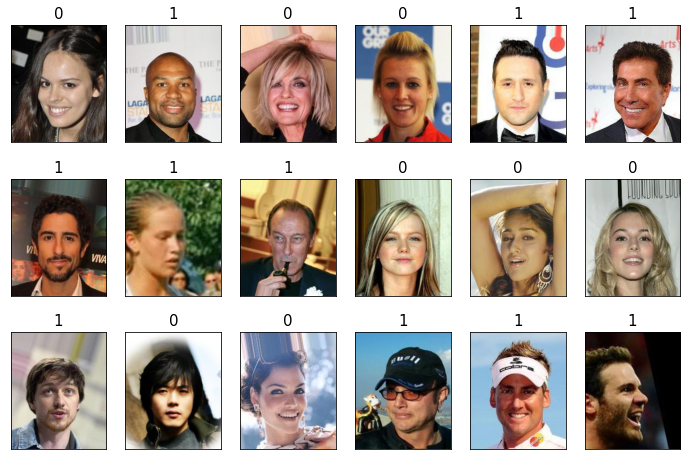

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 8))
for i, (image, label) in enumerate(zip(images, labels)):
    ax = fig.add_subplot(3, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image)
    ax.set_title('{}'.format(label), size=15)
plt.show()

In [7]:
# 다른 방법
mnist, mnist_info = tfds.load('mnist', with_info=True, shuffle_files=False)
print(mnist_info)

1.0.0
Using /Users/sunghyouk/tensorflow_datasets/mnist/3.0.1 instead.


Dl Completed...: 100%|██████████| 4/4 [00:03<00:00,  1.32 file/s]

Dataset mnist downloaded and prepared to /Users/sunghyouk/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/Users/sunghyouk/tensorflow_datasets/mnist/3.0.1',
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT L

In [8]:
print(mnist.keys())

dict_keys(['test', 'train'])
